In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


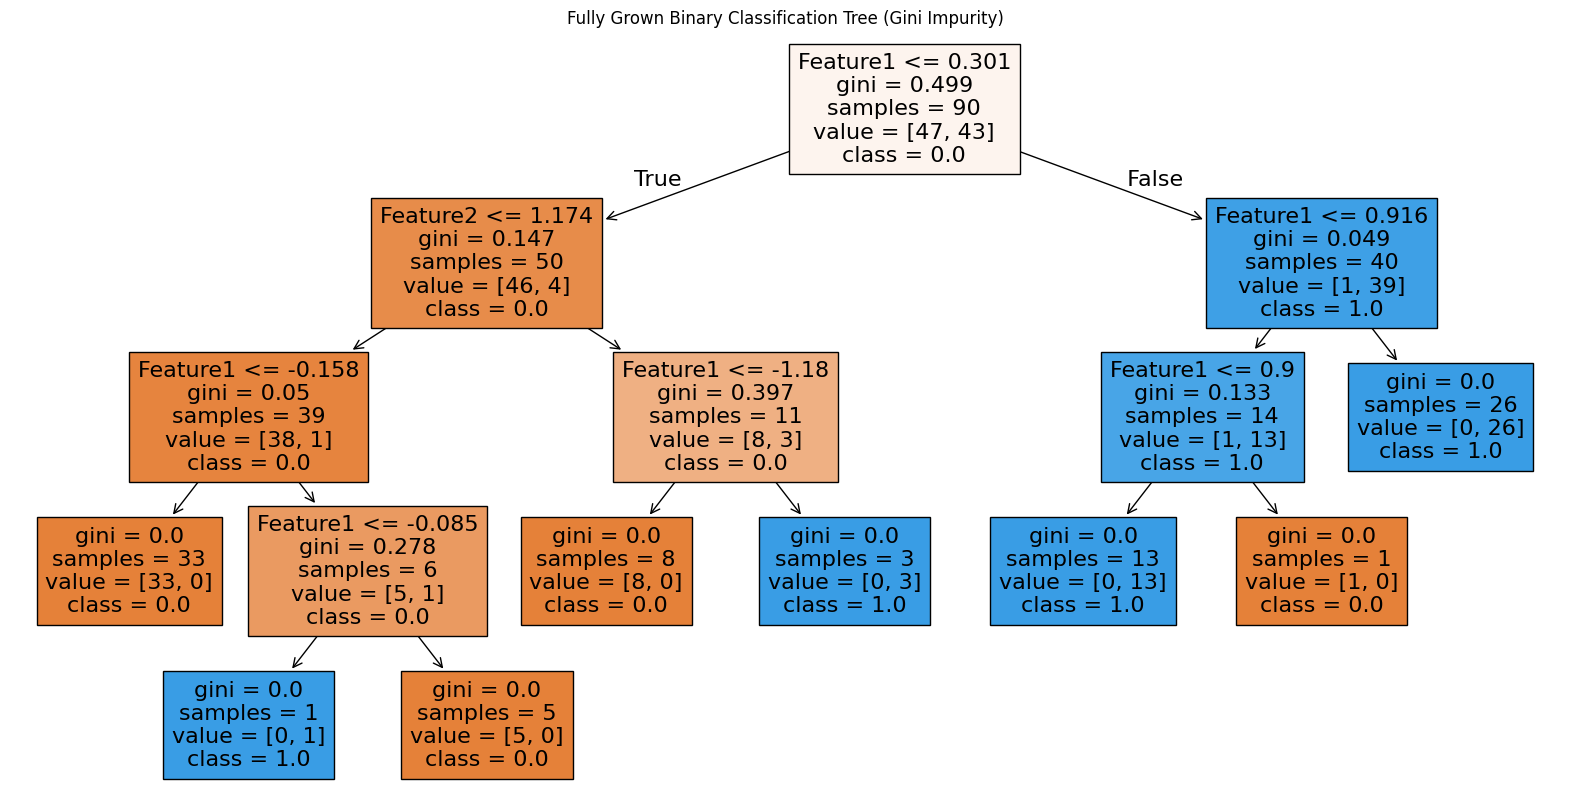

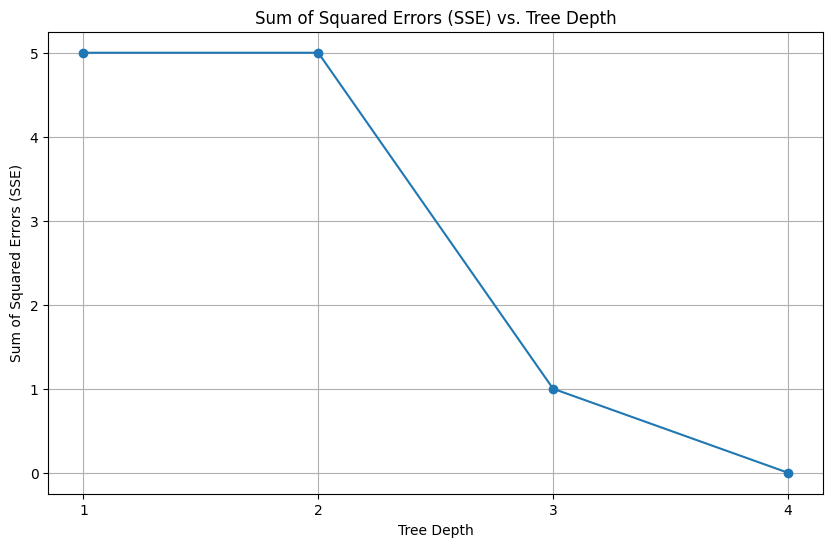


Optimal Pruning Depth (heuristic based on SSE change < 0.1): 1


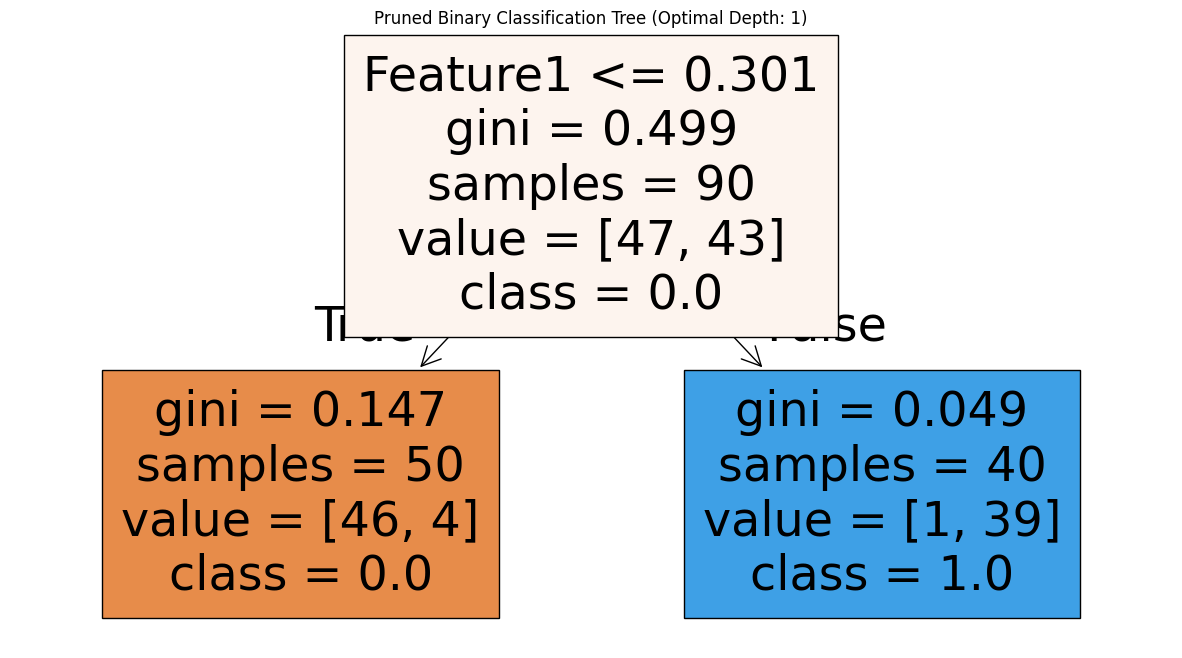

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

try:
    df = pd.read_csv('/content/drive/MyDrive/A4_test_a4d66d34-6db0-44a4-a7c1-0aa26ab8d705.csv')
except FileNotFoundError:
    print("Error: A4_test_a4d66d34-6db0-44a4-a7c1-0aa26ab8d705.csv not found. Please upload the file.")

else:

    X = df.iloc[:, :-1]
    y = df.iloc[:, -1]

    if not np.all(np.isin(y, [0, 1])):
        print("Warning: The target variable does not seem to be binary (0 or 1). This might affect SSE calculation for classification.")

    full_tree = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_leaf=1, random_state=42)
    full_tree.fit(X, y)

    plt.figure(figsize=(20, 10))
    plot_tree(full_tree, filled=True, feature_names=X.columns.tolist(), class_names=[str(c) for c in full_tree.classes_])
    plt.title('Fully Grown Binary Classification Tree (Gini Impurity)')
    plt.show()

    max_depth_full_tree = full_tree.tree_.max_depth
    sse_per_depth = []
    depths = range(1, max_depth_full_tree + 1)

    for depth in depths:
        temp_tree = DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=42)
        temp_tree.fit(X, y)

        y_pred_numeric = temp_tree.predict(X)

        sse = np.sum((y - y_pred_numeric)**2)
        sse_per_depth.append(sse)

    plt.figure(figsize=(10, 6))
    plt.plot(depths, sse_per_depth, marker='o')
    plt.title('Sum of Squared Errors (SSE) vs. Tree Depth')
    plt.xlabel('Tree Depth')
    plt.ylabel('Sum of Squared Errors (SSE)')
    plt.xticks(depths)
    plt.grid(True)
    plt.show()

    sse_diff = np.diff(sse_per_depth)


    threshold_for_minimal_change = 0.1
    determined_optimal_depth = 1

    if len(sse_diff) > 0:
        for i in range(len(sse_diff)):
            if abs(sse_diff[i]) < threshold_for_minimal_change:
                determined_optimal_depth = depths[i]
                break
        else:
            determined_optimal_depth = max_depth_full_tree
    else:
        determined_optimal_depth = 1

    print(f"\nOptimal Pruning Depth (heuristic based on SSE change < {threshold_for_minimal_change}): {determined_optimal_depth}")


    pruned_tree = DecisionTreeClassifier(criterion='gini', max_depth=determined_optimal_depth, random_state=42)
    pruned_tree.fit(X, y)

    plt.figure(figsize=(15, 8))
    plot_tree(pruned_tree, filled=True, feature_names=X.columns.tolist(), class_names=[str(c) for c in pruned_tree.classes_])
    plt.title(f'Pruned Binary Classification Tree (Optimal Depth: {determined_optimal_depth})')
    plt.show()

Dataset 'A2_P2.csv' loaded successfully.
First 5 rows of the dataset:
   Samples  Feature 1  Feature 2  Output
0        1        0.7      48000       1
1        2        1.9      48000       0
2        3        2.5      60000       1
3        4        4.2      63000       0
4        5        6.0      76000       0

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Samples    200 non-null    int64  
 1   Feature 1  200 non-null    float64
 2   Feature 2  200 non-null    int64  
 3   Output     200 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 6.4 KB

Training set size: 160 samples
Testing set size: 40 samples
Number of features: 3

--- Linear Regression ---
Linear Regression - Mean Squared Error (MSE): 0.1080


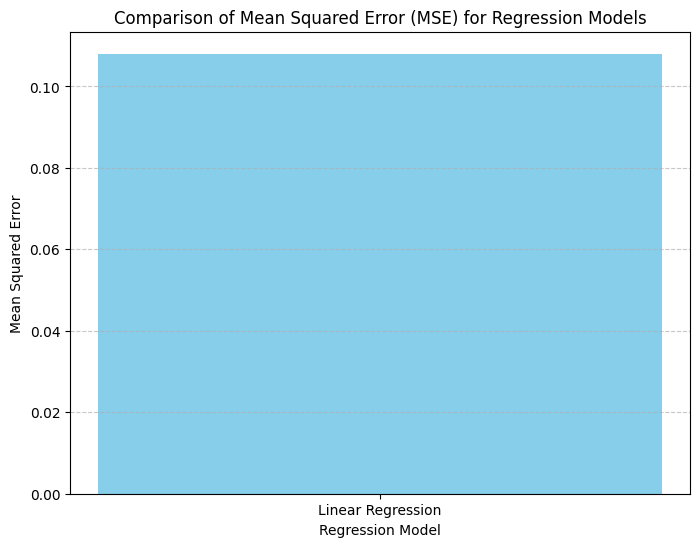

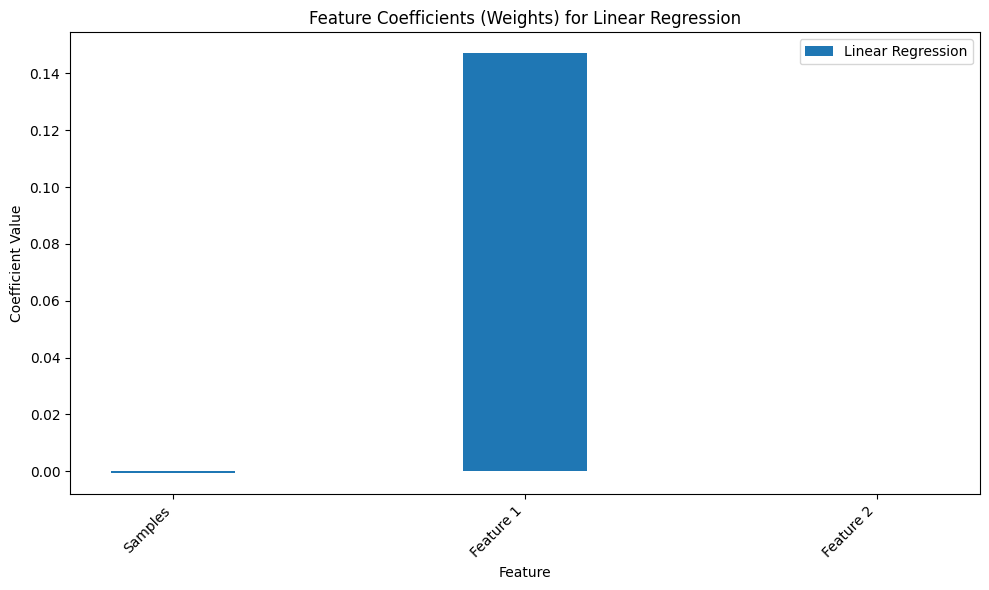

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np


file_path = '/content/drive/MyDrive/A2_P2_ae609303-e3ee-4dc3-85f0-d40fdde4ae63.csv'

try:
    df_reg = pd.read_csv(file_path)
    print("Dataset 'A2_P2.csv' loaded successfully.")
    print("First 5 rows of the dataset:")
    print(df_reg.head())
    print("\nDataset Info:")
    df_reg.info()

except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found. Please ensure it is uploaded.")
    exit()
except Exception as e:
    print(f"An error occurred while loading the dataset: {e}")
    exit()

X_reg = df_reg.iloc[:, :-1]
y_reg = df_reg.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print(f"Number of features: {X_reg.shape[1]}")

print("\n--- Linear Regression ---")
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred_linear = linear_model.predict(X_test)

mse_linear = mean_squared_error(y_test, y_pred_linear)
print(f"Linear Regression - Mean Squared Error (MSE): {mse_linear:.4f}")

mse_values = {'Linear Regression': mse_linear}
coefficients = {'Linear Regression': linear_model.coef_}

plt.figure(figsize=(8, 6))
methods = list(mse_values.keys())
mses = list(mse_values.values())
plt.bar(methods, mses, color='skyblue')
plt.title('Comparison of Mean Squared Error (MSE) for Regression Models')
plt.xlabel('Regression Model')
plt.ylabel('Mean Squared Error')
plt.ylim(bottom=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

num_features = X_reg.shape[1]
feature_names = X_reg.columns.tolist() if X_reg.columns.tolist() else [f'Feature {j+1}' for j in range(num_features)]

fig, ax = plt.subplots(figsize=(max(10, num_features * 0.6), 6))
x = np.arange(num_features)
width = 0.35

for i, (method, coefs) in enumerate(coefficients.items()):
    ax.bar(x, coefs, width, label=method)

ax.set_ylabel('Coefficient Value')
ax.set_xlabel('Feature')
ax.set_title('Feature Coefficients (Weights) for Linear Regression')
ax.set_xticks(x)
ax.set_xticklabels(feature_names, rotation=45, ha='right')
ax.legend()
plt.tight_layout()
plt.show()